# Load Database Tables into Python

In [1]:
# Import Dependencies
import sqlalchemy
from sqlalchemy import create_engine
from config import db_password
import pandas as pd

In [2]:
# Import dependencies
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical
from keras.layers.advanced_activations import LeakyReLU

import matplotlib.pyplot as plt
import numpy as np


Using TensorFlow backend.


In [3]:
# read data from Postgres Database
engine = create_engine('postgresql://postgres:'+ db_password +'@localhost:5432/AI_Music_DB')

notes_df = pd.read_sql_table('Notes_Spectrogram_Table',engine)
# notes_df

In [4]:
# Convert Spectrograms from list to ndarray
notes_df['Spectrogram'] = notes_df['Spectrogram'].apply(lambda x: np.array(x))

type(notes_df['Spectrogram'].iloc[0])

numpy.ndarray

# MODEL - Neural Network 

In [5]:
# Create train and test data sets
X_series = notes_df["Spectrogram"]
y = notes_df["Note"]

In [6]:
# Parameters
channels = 1 # number of audio channels
spectrogram_shape = X_series[1].shape + (channels,)
batch = spectrogram_shape[1]

In [7]:
X_series.shape

(2913,)

In [8]:
count = 0

for i in X_series[1]:
    count =+ 1

count

1

In [9]:
# Reshape X into size of spectrogram and convert to ndarray
X = np.array([i.reshape( (spectrogram_shape) ) for i in X_series])

In [10]:
# Encode pitches

le = LabelEncoder() 
y = le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Reshape for model
# X_train = np.array([X.reshape(20, 20, 1) for x in X_train])
# X_test = np.array([X.reshape(20, 20, 1) for x in X_test])

# onehotencoder = OneHotEncoder() 
y_test_hot = to_categorical(y_test)
y_train_hot = to_categorical(y_train)

In [11]:
# Troubleshooting queries
type(X_train[1])
X_train[1].shape
# X_train[1]

(22, 128, 1)

In [12]:
# # Model
# model = Sequential()
# # input_shape=(128, 128, 1)

# model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=spectrogram_shape))
# model.add(MaxPooling2D((4, 2), strides=(4, 2)))
# model.add(Activation('relu'))

# model.add(Conv2D(48, (5, 5), padding="valid"))
# model.add(MaxPooling2D((4, 2), strides=(4, 2)))
# model.add(Activation('relu'))

# model.add(Conv2D(48, (5, 5), padding="valid"))
# model.add(Activation('relu'))

# model.add(Flatten())
# model.add(Dropout(rate=0.5))

# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(rate=0.5))

# model.add(Dense(10))
# model.add(Activation('softmax'))

In [13]:
# model.compile(
# 	optimizer="Adam",
# 	loss="categorical_crossentropy",
# 	metrics=['accuracy'])

# model.fit(
# 	x=X_train, 
# 	y=y_train,
#     epochs=12,
#     batch_size=batch,
#     validation_data= (X_test, y_test))

# score = model.evaluate(
# 	x=X_test,
# 	y=y_test)

# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [14]:
# Model
notes_model = Sequential()
notes_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(spectrogram_shape),padding='same'))
notes_model.add(LeakyReLU(alpha=0.1))
notes_model.add(MaxPooling2D((2, 2),padding='same'))
notes_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
notes_model.add(LeakyReLU(alpha=0.1))
notes_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
notes_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
notes_model.add(LeakyReLU(alpha=0.1))                  
notes_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
notes_model.add(Flatten())
notes_model.add(Dense(128, activation='linear'))
notes_model.add(LeakyReLU(alpha=0.1))                  
notes_model.add(Dense(12, activation='softmax'))

In [15]:
notes_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [16]:
# notes_model.summary()

In [17]:
notes_train = notes_model.fit(X_train, y_train_hot, batch_size=batch,epochs=8,verbose=1,validation_data=(X_test, y_test_hot))

Train on 2184 samples, validate on 729 samples
Epoch 1/8
2184/2184 [==============================] - 12s 5ms/step - loss: 2.1920 - accuracy: 0.3636 - val_loss: 1.2041 - val_accuracy: 0.6612
Epoch 2/8
2184/2184 [==============================] - 11s 5ms/step - loss: 0.6365 - accuracy: 0.8182 - val_loss: 0.4216 - val_accuracy: 0.8807
Epoch 3/8
2184/2184 [==============================] - 10s 5ms/step - loss: 0.2716 - accuracy: 0.9208 - val_loss: 0.2768 - val_accuracy: 0.9191
Epoch 4/8
2184/2184 [==============================] - 10s 5ms/step - loss: 0.1503 - accuracy: 0.9597 - val_loss: 0.2060 - val_accuracy: 0.9465
Epoch 5/8
2184/2184 [==============================] - 10s 5ms/step - loss: 0.0879 - accuracy: 0.9734 - val_loss: 0.2068 - val_accuracy: 0.9410
Epoch 6/8
2184/2184 [==============================] - 10s 5ms/step - loss: 0.0452 - accuracy: 0.9918 - val_loss: 0.2035 - val_accuracy: 0.9492
Epoch 7/8
2184/2184 [==============================] - 10s 5ms/step - loss: 0.0225 - accu

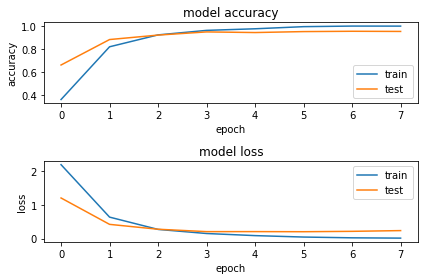

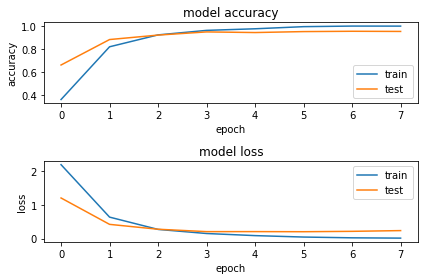

In [18]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(notes_train.history['accuracy'])
plt.plot(notes_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(notes_train.history['loss'])
plt.plot(notes_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig